<div class="alert alert-block alert-info">
<ul>
<li>Course: Machine Learning</li>
<li>Project: 01</li>
<li>Team members</li>
<li>Mauro Travieso Pena</li>
<li>Quoc Huy Luong</li>
<li>Ngoc Bao Tran</li>
<ul>
</div>



# Classification with Decision Tree

<div class="alert alert-block alert-info">
In this experiment, we use decision tree to classify the anmie dataset.
<ol>
<li>Clean and Transform Data</li>
<li>Split Training/Testing dataset</li>
<li>Run the model with 3 kind of data: Original data, Normalized data and PCA data</li>
<li>Turning the model based on the learning curve and validation curve
<ol><b>Learning Curve</b>
<li>Using scikit-learn method
#https://scikit-learn.org/stable/modules/learning_curve.html</li>
<li>Our method (we did it, because we want to know how learning curve method works)</li>
</ol>
<ol><b>Validation Curve</b>
<li>Using scikit-learn method
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
<li>Our method (we did it, because we want to know how Validation curve method works)</li>
</ol>
</li>
<li>Grid search CV</li>
<li>Final Evaluation</li>
</ol> 
</div>


# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import import_ipynb 
import functions as myLib
import myPlot as myPlotLib



importing Jupyter notebook from functions.ipynb
importing Jupyter notebook from myPlot.ipynb


# Load data from files

In [2]:
RawData = pd.read_csv('../data/anime.csv')


#### Clean and Transform Data

In [3]:
Cleaned_Data = myLib.myCleanAndTransformData(RawData)
Y_Data = Cleaned_Data['Class']
X_Data = Cleaned_Data.drop(columns=['Class'])


#### Normalize  Data

In [4]:
Normalized_Data = myLib.myNormalize(X_Data)

#### PCA

In [5]:
n_components=40
PCA_Data = myLib.myPCA(Normalized_Data,n_components)
PCA_Data.head()


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.311391,0.786561,-0.420790,0.005234,-0.078663,-0.049646,-0.062640,0.007159,-0.075350,-0.030939,...,-0.011765,-0.014521,0.009479,-0.010493,-0.008280,-0.004228,0.005226,-0.013213,-0.006792,-0.008074
1,-0.284662,0.764035,-0.411982,-0.010872,-0.110067,-0.087035,-0.096786,0.054585,-0.179466,-0.045549,...,-0.007235,-0.013019,0.006362,-0.011357,-0.008352,-0.001455,0.008352,-0.012816,-0.008436,-0.008627
2,-0.284659,0.767955,-0.395541,-0.007615,-0.091869,-0.059768,-0.062093,0.036484,-0.086830,-0.024722,...,-0.009478,-0.014725,0.006571,-0.012732,-0.009980,-0.005412,0.006489,-0.014800,-0.013024,-0.008547
3,-0.291422,0.777222,-0.408286,0.000300,-0.080828,-0.049801,-0.056895,0.019128,-0.070776,-0.027971,...,-0.012257,-0.015423,0.007624,-0.011305,-0.009440,-0.007883,0.004237,-0.014414,-0.011988,-0.010424
4,0.731807,-0.153182,-0.102195,-0.458238,0.816873,0.046188,0.015792,-0.064744,0.014353,-0.005003,...,0.006816,-0.013240,0.020038,-0.014597,-0.007294,0.026876,0.025312,-0.018810,-0.001452,0.046504


####----------------------------------------------------------------
# Decision Tree Classification 
####----------------------------------------------------------------

In [6]:
Y_Data.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [7]:
X_Data.head()

,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,genre_ Comedy,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
0,200630,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200630,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,200630,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200630,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,793665,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Normalized_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.782769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
PCA_Data.head()


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.311391,0.786561,-0.420790,0.005234,-0.078663,-0.049646,-0.062640,0.007159,-0.075350,-0.030939,...,-0.011765,-0.014521,0.009479,-0.010493,-0.008280,-0.004228,0.005226,-0.013213,-0.006792,-0.008074
1,-0.284662,0.764035,-0.411982,-0.010872,-0.110067,-0.087035,-0.096786,0.054585,-0.179466,-0.045549,...,-0.007235,-0.013019,0.006362,-0.011357,-0.008352,-0.001455,0.008352,-0.012816,-0.008436,-0.008627
2,-0.284659,0.767955,-0.395541,-0.007615,-0.091869,-0.059768,-0.062093,0.036484,-0.086830,-0.024722,...,-0.009478,-0.014725,0.006571,-0.012732,-0.009980,-0.005412,0.006489,-0.014800,-0.013024,-0.008547
3,-0.291422,0.777222,-0.408286,0.000300,-0.080828,-0.049801,-0.056895,0.019128,-0.070776,-0.027971,...,-0.012257,-0.015423,0.007624,-0.011305,-0.009440,-0.007883,0.004237,-0.014414,-0.011988,-0.010424
4,0.731807,-0.153182,-0.102195,-0.458238,0.816873,0.046188,0.015792,-0.064744,0.014353,-0.005003,...,0.006816,-0.013240,0.020038,-0.014597,-0.007294,0.026876,0.025312,-0.018810,-0.001452,0.046504


####----------------------------------------------------------------
#### Split Original Data
####----------------------------------------------------------------

In [10]:
X_train, X_test, y_train, y_test  = myLib.mySplitData(X_Data,Y_Data,0.33,42)

X_train.head()

,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,genre_ Comedy,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
32729,132,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24946,7051,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8676,65896,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13244,67936,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29384,49,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_test.head()

,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,genre_ Comedy,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
22373,3331,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10508,28423,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11570,5078,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22262,390,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
734,482268,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_train.head()

32729    1
24946    0
8676     1
13244    1
29384    1
Name: Class, dtype: int64

In [13]:
y_test.head()


22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

####----------------------------------------------------------------
#### Split Original Normalized_Data
####----------------------------------------------------------------

In [14]:
Normalized_X_train, Normalized_X_test, Normalized_y_train, Normalized_y_test  = myLib.mySplitData(Normalized_Data,Y_Data,0.33,42)

Normalized_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
32729,0.000118,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24946,0.006942,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8676,0.064980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13244,0.066992,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29384,0.000036,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
Normalized_X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
22373,0.003273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10508,0.028021,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11570,0.004997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22262,0.000373,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
734,0.475642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
Normalized_y_train.head()

32729    1
24946    0
8676     1
13244    1
29384    1
Name: Class, dtype: int64

In [17]:
Normalized_y_test.head()


22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

####----------------------------------------------------------------
#### Split  PCA_Data
####----------------------------------------------------------------

In [18]:
PCA_X_train, PCA_X_test, PCA_y_train, PCA_y_test  = myLib.mySplitData(PCA_Data,Y_Data,0.33,42)

PCA_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
32729,-0.222410,0.292968,0.905577,-0.156240,-0.108038,-0.031218,-0.020906,0.049072,-0.031243,0.007778,...,-0.432565,-0.042685,0.027173,-0.022939,0.006547,0.054539,0.051587,0.071951,0.304651,-0.226392
24946,-0.645218,-0.558932,-0.134425,-0.006471,-0.054637,-0.037266,-0.023106,-0.012107,-0.029795,0.004538,...,0.049375,0.042381,-0.037704,-0.002914,0.011983,0.350497,0.801526,-0.404791,-0.203026,-0.088281
8676,0.697428,-0.148271,-0.076755,-0.039170,-0.073629,-0.033199,-0.020331,0.015740,-0.034394,-0.002522,...,0.146118,0.198321,-0.365065,-0.068019,0.856744,-0.128278,-0.056889,-0.036339,-0.035871,-0.023881
13244,0.703994,-0.156393,-0.072758,-0.051336,-0.099958,-0.053601,-0.030918,0.052111,-0.056604,-0.005999,...,-0.012919,-0.004194,0.003538,-0.000356,-0.002386,-0.014029,-0.011264,-0.002163,-0.002285,-0.006428
29384,0.702822,-0.120081,-0.090825,-0.060693,-0.137073,-0.101899,-0.122610,0.067888,-0.325710,0.726579,...,-0.006901,-0.000095,0.001849,0.001905,0.000037,-0.009589,-0.009906,0.000658,-0.000404,-0.001162


In [19]:
PCA_X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
22373,-0.124203,0.125895,0.130241,0.040248,-0.039136,0.017932,0.271853,0.949263,0.306449,-0.021895,...,-0.019547,-0.022848,0.030732,0.021103,0.014082,-0.014259,0.001032,-0.008622,-0.003939,-0.012285
10508,0.709233,-0.165356,-0.059587,-0.058864,-0.111087,-0.063255,-0.035980,0.070086,-0.072611,-0.002226,...,-0.010653,-0.002653,0.001374,-0.001019,-0.002562,-0.013152,-0.010675,-0.001440,-0.003101,-0.006993
11570,-0.302989,0.781850,-0.421044,-0.036603,-0.226477,0.908892,0.064898,-0.181633,0.053341,-0.011209,...,-0.006009,-0.006196,-0.000419,-0.007847,-0.006045,-0.004757,0.002184,-0.005744,-0.004486,-0.016404
22262,-0.292379,0.765577,-0.409821,-0.008916,-0.110511,-0.085449,-0.096096,0.057723,-0.179229,-0.042895,...,-0.009830,-0.008746,0.000728,-0.007478,-0.006503,-0.009537,-0.000071,-0.007194,-0.007324,-0.021002
734,0.719961,-0.159583,-0.077230,-0.055383,-0.099040,-0.056883,-0.032346,0.045618,-0.057094,-0.011492,...,-0.007550,-0.013037,0.015197,-0.008382,-0.006212,0.002695,0.006165,-0.013796,-0.004586,0.019178


In [20]:
PCA_y_train.head()

32729    1
24946    0
8676     1
13244    1
29384    1
Name: Class, dtype: int64

In [21]:
PCA_y_test.head()


22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

####----------------------------------------------------------------
# Model Training 
####----------------------------------------------------------------

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

def myDT(clf,X_train,y_train,X_test,y_test,cv):
    #Fit the model
    #The maximum depth of the tree. 
    #If None, then nodes are expanded until all leaves are pure
    # or until all leaves contain less than min_samples_split samples.
    #min_samples_split: by default = 1
    clf.fit(X_train, y_train)
    #check accuracy of model on the train and test data
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    #Using CV
    cv_scores = cross_val_score(clf, X_train, y_train, cv=cv)
    return pd.DataFrame({"leaves":[clf.get_n_leaves()],"depth":[clf.get_depth()],"train_score":[train_score],"test_score":[test_score],"cv_score":[cv_scores.mean()]})


In [23]:
def myDT_ModelTurning(clf,depths,X_train,y_train,X_test,y_test,cv):
    df = pd.DataFrame({"depth":[],"train_score":[],"cv_score":[]})
    for depth in depths:
        clf1 = DecisionTreeClassifier(max_depth=depth,random_state=0)
        score_df = myDT(clf1,X_train,y_train,X_test,y_test,cv)
        df = df.append(pd.DataFrame({"depth":depth,"train_score":score_df.train_score,"test_score":score_df.test_score,"cv_score":score_df.cv_score}),ignore_index=True,sort=False)
    
    return df

In [24]:

cv = 10
clf = DecisionTreeClassifier(random_state=0)

In [25]:
#Original Data
scores = myDT(clf,X_train,y_train,X_test,y_test,cv)
scores

,leaves,depth,train_score,test_score,cv_score
0,4456,44,0.988382,0.821124,0.815258


In [26]:
#Normalized Data
scores = myDT(clf,Normalized_X_train,Normalized_y_train,Normalized_X_test,Normalized_y_test,cv)
scores

,leaves,depth,train_score,test_score,cv_score
0,4456,44,0.988382,0.820866,0.8153


In [27]:
#PCA Data
scores = myDT(clf,PCA_X_train,PCA_y_train,PCA_X_test,PCA_y_test,cv)
scores


,leaves,depth,train_score,test_score,cv_score
0,5657,60,0.974771,0.75226,0.746609


In [28]:
X_Data = PCA_Data
X_train = PCA_X_train
X_test = PCA_X_test
y_train = PCA_y_train
y_test = PCA_y_test


####----------------------------------------------------------------
# Learning Curve
####----------------------------------------------------------------
#https://scikit-learn.org/stable/modules/learning_curve.html

In [29]:
from sklearn.model_selection import learning_curve
splitsSize = np.linspace(0.04,0.99,20)
splitsSize

array([0.04, 0.09, 0.14, 0.19, 0.24, 0.29, 0.34, 0.39, 0.44, 0.49, 0.54,
       0.59, 0.64, 0.69, 0.74, 0.79, 0.84, 0.89, 0.94, 0.99])

In [30]:
train_sizes, train_scores, test_scores = learning_curve(
        clf, X_Data, Y_Data, cv=cv, n_jobs=1, train_sizes=splitsSize)

In [31]:
train_sizes

array([ 1267,  2851,  4435,  6019,  7603,  9187, 10771, 12355, 13939,
       15523, 17107, 18691, 20275, 21859, 23443, 25027, 26611, 28195,
       29779, 31363])

In [32]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.       

In [33]:
test_scores

array([[0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.6438511

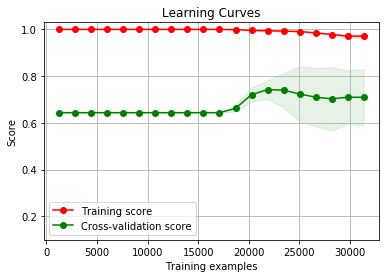

In [34]:
title = "Learning Curves"
myPlotLib.plot_learning_curve(clf, title, X_Data, Y_Data, ylim=(0.1, 1.03),train_sizes=splitsSize, cv=cv, n_jobs=4)
plt.show()


In [35]:
def myDT_LearningCurve(clf,X_Data,Y_Data,splits,cv):
    df = pd.DataFrame({"percent":[],"train_score":[],"test_score":[],"cv_score":[]})
    for X in splits:
        X_train, X_test, y_train, y_test  = myLib.mySplitDataByTrainSize(X_Data,Y_Data,X,42)
        score_df = myDT(clf,X_train,y_train,X_test,y_test,cv)
        df = df.append(pd.DataFrame({"percent":X,"train_score":score_df.train_score,"test_score":score_df.test_score,"cv_score":score_df.cv_score}),ignore_index=True,sort=False)
    return df


In [36]:
learning_df= myDT_LearningCurve(clf,X_Data,Y_Data,splitsSize,cv)
learning_df

,percent,train_score,test_score,cv_score
0,0.04,0.997879,0.694624,0.687178
1,0.09,0.995759,0.712237,0.715371
2,0.14,0.993638,0.720959,0.750394
3,0.19,0.993080,0.727808,0.741945
4,0.24,0.990989,0.737446,0.740983
5,0.29,0.990057,0.744731,0.740903
6,0.34,0.986904,0.744557,0.742458
7,0.39,0.985647,0.742000,0.739694
8,0.44,0.985254,0.736502,0.741905
9,0.49,0.983385,0.741567,0.738058


In [37]:
learning_df.describe()

,percent,train_score,test_score,cv_score
count,20.000000,20.000000,20.000000,20.000000
mean,0.515000,0.984549,0.737321,0.739383
std,0.295804,0.006875,0.013873,0.014221
min,0.040000,0.975866,0.694624,0.687178
25%,0.277500,0.979110,0.737210,0.740398
50%,0.515000,0.982859,0.741516,0.742202
75%,0.752500,0.990290,0.744531,0.746620
max,0.990000,0.997879,0.752015,0.750394


Text(0.5, 1.0, 'Learning Curve of CV:10')

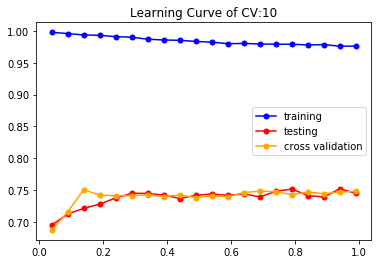

In [38]:

fig, ax = plt.subplots()
plt.plot(learning_df.percent, learning_df.train_score, color='blue', marker='o', markersize=5, label='training')

plt.plot(learning_df.percent, learning_df.test_score, color='red', marker='o', markersize=5, label='testing')

plt.plot(learning_df.percent, learning_df.cv_score, color='orange', marker='o', markersize=5, label='cross validation')

ax.legend()
ax.set_title("Learning Curve of CV:10")


<div class="alert alert-block alert-danger">
Based on the Learning Curve, we saw that 
<ul>
<li>Very small samples dataset has high variance. It means the model perfomrs very well on training data (<b>min = 0.993589</b>), but has high erro rates on the test data (<b>min = 0.692473</b>)</li>
<li>Adding more training samples (<b>>25K</b>) may not affect the accuracy of the model</li>
</ul>
</div>


####----------------------------------------------------------------
# Validation Curve
####----------------------------------------------------------------

In [39]:
depths = [1,2,4, 5, 8,10,15, 20,25,30,35,40,50,60,70,80,90,100,150,200]

In [40]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(),X_train, y_train, 
    param_name="max_depth", param_range=depths,
    cv=cv, n_jobs=1)


In [41]:
train_scores

array([[0.64243309, 0.64244994, 0.64244994, 0.64241967, 0.64241967,
        0.64241967, 0.64241967, 0.64241967, 0.64241967, 0.64241967],
       [0.67711082, 0.67783274, 0.67797409, 0.6753981 , 0.67751814,
        0.67487986, 0.67563366, 0.67780081, 0.67506831, 0.67798926],
       [0.70646438, 0.70468787, 0.70464075, 0.6992839 , 0.70507868,
        0.70423066, 0.7024404 , 0.70390088, 0.70145105, 0.70324131],
       [0.72304938, 0.71891637, 0.71137809, 0.72057854, 0.71332328,
        0.71322906, 0.71120324, 0.71214548, 0.71219259, 0.72086121],
       [0.7622974 , 0.75467609, 0.74949352, 0.77904457, 0.7435221 ,
        0.75308584, 0.74724395, 0.74757373, 0.74922265, 0.76316781],
       [0.79287599, 0.79891637, 0.77912839, 0.81508527, 0.76957505,
        0.77946858, 0.76910393, 0.76707811, 0.78865542, 0.79261283],
       [0.86496419, 0.86709069, 0.85771496, 0.87948742, 0.85079619,
        0.83953642, 0.85616697, 0.85776877, 0.85235089, 0.84919438],
       [0.91792311, 0.91411072, 0.9153828

In [42]:
valid_scores


array([[0.64237288, 0.64222128, 0.64222128, 0.64249364, 0.64249364,
        0.64249364, 0.64249364, 0.64249364, 0.64249364, 0.64249364],
       [0.66016949, 0.67952522, 0.67867741, 0.67599661, 0.67387617,
        0.6798134 , 0.67133164, 0.67938931, 0.67684478, 0.67302799],
       [0.67627119, 0.69605765, 0.70284019, 0.68617472, 0.70949958,
        0.70780322, 0.69126378, 0.70992366, 0.70525869, 0.68787108],
       [0.69237288, 0.71301399, 0.71555744, 0.7158609 , 0.71289228,
        0.71543681, 0.70737913, 0.70695505, 0.71798134, 0.69762511],
       [0.72033898, 0.73548114, 0.73251378, 0.75021204, 0.7336726 ,
        0.74597116, 0.72943172, 0.73112807, 0.72815946, 0.73240034],
       [0.73855932, 0.76049173, 0.73293769, 0.77056828, 0.74427481,
        0.74766751, 0.73112807, 0.7408821 , 0.76166243, 0.75063613],
       [0.775     , 0.76473082, 0.77193726, 0.77820187, 0.77014419,
        0.76717557, 0.78710772, 0.77226463, 0.7625106 , 0.75742154],
       [0.75889831, 0.75837219, 0.7583721

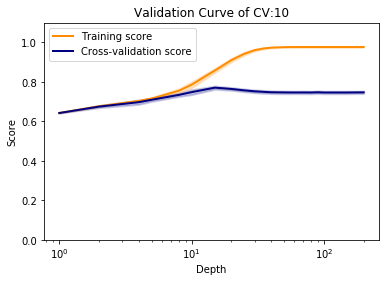

In [43]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve of CV:10")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(depths, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(depths, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(depths, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(depths, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


####----------------------------------------------------------------
# Model Turning
####----------------------------------------------------------------

In [44]:
learnig_df= myDT_ModelTurning(clf,depths,X_train,y_train,X_test,y_test,cv)
learnig_df

,depth,train_score,cv_score,test_score
0,1.0,0.642427,0.642427,0.646639
1,2.0,0.677154,0.674865,0.677542
2,4.0,0.704418,0.697296,0.701386
3,5.0,0.713111,0.709507,0.711285
4,8.0,0.746014,0.733719,0.731945
5,10.0,0.769081,0.747796,0.746406
6,15.0,0.850831,0.770607,0.780666
7,20.0,0.905275,0.764460,0.774985
8,25.0,0.941528,0.756913,0.764483
9,30.0,0.959676,0.752291,0.758630


In [45]:
learnig_df.describe()

,depth,train_score,cv_score,test_score
count,20.000000,20.000000,20.000000,20.000000
mean,49.750000,0.882338,0.736030,0.741061
std,53.155061,0.122673,0.031442,0.032822
min,1.000000,0.642427,0.642427,0.646639
25%,9.500000,0.763314,0.743323,0.742791
50%,32.500000,0.963831,0.746609,0.752260
75%,72.500000,0.974771,0.748602,0.753831
max,200.000000,0.974771,0.770607,0.780666


Text(0.5, 1.0, 'Training and Cross validation scores of CV:10')

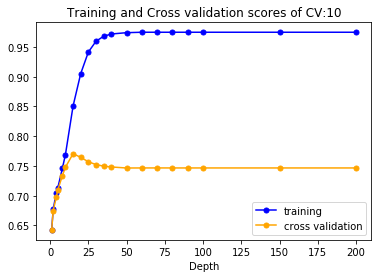

In [46]:

fig,ax = plt.subplots()
plt.xlabel("Depth")
plt.plot(learnig_df.depth, learnig_df.train_score, color='blue', marker='o', markersize=5, label='training')
plt.plot(learnig_df.depth, learnig_df.cv_score, color='orange', marker='o', markersize=5, label='cross validation')

ax.legend()
ax.set_title("Training and Cross validation scores of CV:10")


<div class="alert alert-block alert-danger">
Based on the Validation Curve, we saw that with the depth > <b>50</b>, 
<ul>
<li>The training scores almost are the same: <b>0.985456</b> </li>
<li>The cross validation scores almost are the same: <b>0.751909</b> </li>
</ul>
That means, the best value of the depth < <b>50</b>, we will do grid search CV based on this range  
</div>


####----------------------------------------------------------------
# Grid Search CV
####----------------------------------------------------------------

In [47]:
#GridSearchCV
def myGS(X_train,y_train,depths,num_leafs):
    from sklearn.model_selection import GridSearchCV
    
    param_grid = [{'max_depth':depths,
                  'min_samples_leaf':num_leafs}]
    clf2 = DecisionTreeClassifier(random_state=0)
    gs = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=10)
    
    gs = gs.fit(X_train, y_train)
    return gs
    

In [48]:
depths = range(10,50,20)
num_leafs = [1,2,4, 5, 8, 10, 20]
gs = myGS(X_train,y_train,depths,num_leafs)
#Training Score
gs.best_score_

0.7904087516960652

In [49]:
gs.best_params_
    

{'max_depth': 30, 'min_samples_leaf': 20}

####----------------------------------------------------------------
# Final Evaluation
####----------------------------------------------------------------

In [50]:
clf = DecisionTreeClassifier(random_state=0,max_depth=gs.best_params_['max_depth'],min_samples_leaf=gs.best_params_['min_samples_leaf'])
#Original Data
scores = myDT(clf,X_train,y_train,X_test,y_test,cv)
scores


,leaves,depth,train_score,test_score,cv_score
0,760,30,0.82662,0.791943,0.790409


<div class="alert alert-block alert-warning">
The accuracy of the model (PCA Data, 40 components): <b>0.791771</b> 
</div>



####----------------------------------------------------------------
# ROC Curve
####----------------------------------------------------------------

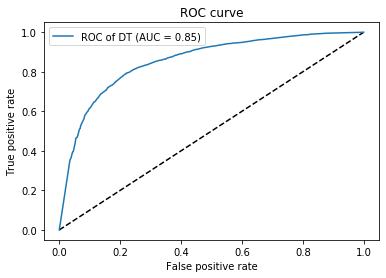

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc

dt_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)
dt_lm.fit(X_test, y_test)

y_pred_dt = clf.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr_dt, tpr_dt)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt, label='ROC of DT (AUC = %0.2f)' % roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()




####----------------------------------------------------------------
# Export Model
####----------------------------------------------------------------

In [52]:

from sklearn.externals import joblib
joblib.dump(clf, 'my_dt_model.pkl', compress=9)


/Users/tranngocbao/.conda/envs/Project01/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['my_dt_model.pkl']

In [53]:
from sklearn.externals import joblib
model_clone = joblib.load('my_dt_model.pkl')
y_pred_dt = model_clone.predict_proba(X_test)[:, 1]
y_pred_dt



array([0.74193548, 0.96      , 0.86666667, ..., 0.4       , 0.3       ,
       0.72      ])